# Problem 1.3: Voltage Peaks - data reader

The following is a small program to read the data file "data_VoltagePeaks.txt", which contains a single column: Voltage.

### Author & Date: 
- Troels C. Petersen (Niels Bohr Institute)
- 07-11-2021

***

In [21]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats

In [22]:
sys.path.append('D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\External_Functions\\')
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [23]:
# Read the data and print it to check it:
voltage = np.loadtxt("data_VoltagePeaks.txt")

print("Number of entries: ", len(voltage))
for i in range(10) : 
    print(f"  {voltage[i]:14.6f}")

Number of entries:  1000000
        1.119280
        1.828920
        0.797830
        2.715827
        1.496780
       12.176045
       24.154821
        1.981145
        0.677696
        0.604801


In [24]:
save_plots = False # For now, don't save plots (once you trust your code, switch on)
verbose = True     # For now, print a lot of output (once you trust your code, switch off)
Nverbose = 10      # But only print a lot for the first 10 random numbers

In [25]:
print(951786/1000000)

0.951786


In [26]:
N_voltage = 84721  # 本图xmin, xmax = 2.5, 3.5范围内voltage点的个数
Npeak = 7367     # Number of random Gaussian points
Nbkg  = 77354   # Number of random Exponential points

xmin, xmax = -0.1,1000000  # 图表显示的范围
Nbins = 1000
binwidth = (xmax-xmin)/Nbins  #binwidth = (xmax-xmin)/Nbins
print(binwidth)

condition = (voltage<xmax)*(voltage>xmin)
x_all = voltage[condition]  # x_2是本图xmin, xmax = 2.5, 3.5范围内voltage点,x是将x_2 binned后的
print(np.size(x_all))
print(type(x_all))

# Find the x, y and error on y (sy) given the histogram:
counts, bin_edges = np.histogram(x_all, bins=Nbins, range=(xmin, xmax))
x = (bin_edges[1:][counts>0] + bin_edges[:-1][counts>0])/2
y = counts[counts>0]
sy = np.sqrt(counts[counts>0])   # NOTE: We (naturally) assume that the bin count is Poisson distributed.
                       # This is an approximation, since there is a low count in the last bins.

# print(np.where(y==177))


1000.0001
999998
<class 'numpy.ndarray'>


C:\Users\dell\AppData\Local\Temp/ipykernel_8356/625049203.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.loglog(x,y, 'r-', Marker='.') #将x、y轴都转化为logged


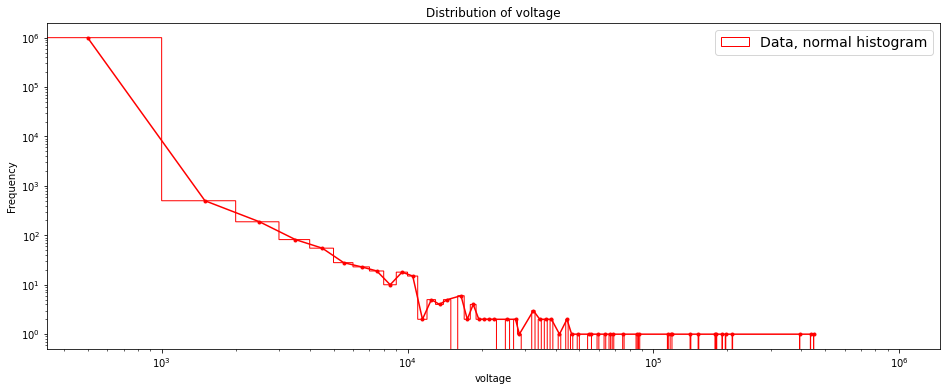

In [38]:
# Create just a single figure and axes, and a (classic) histogram:
fig, ax = plt.subplots(figsize=(16, 6))  # figsize is in inches
#ax.set_yscale('log',nonposy='mask',subsy=[0]) #将y轴转化为logged
plt.loglog(x,y, 'r-', Marker='.') #将x、y轴都转化为logged
hist = ax.hist(x_all, bins=1000, range=(xmin, xmax), histtype='step', linewidth=1,color='red', label='Data, normal histogram')

#ax.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

# Set the figure texts; xlabel, ylabel and title.
ax.set(xlabel="voltage",           # the label of the y axis
       ylabel="Frequency",           # the label of the y axis
       title="Distribution of voltage")    # the title of the plot
ax.legend(loc='best', fontsize=14);       # could also be # loc = 'upper right' e.g.


fig.savefig('fig1',dpi=600)

In [28]:
def fit_pdf(x,A,B,C,D,E,F,G):
    return A*x**6 + B*x**5 + C*x**4 + D*x**3 + E*x**2 + F*x**1 + G*x**0

In [29]:
Minuit.print_level = 1    # Print result of fits (generally - can also be moved down to each fit instance)

# Defining Chi2 calculation:
def chi2_owncalc(A,B,C,D,E,F,G) :
    y_fit = fit_pdf(x,A,B,C,D,E,F,G)
    chi2 = np.sum(((y - y_fit) / sy)**2)
    return chi2

# Alternatively, use the Chi2 regression from External Functions:
chi2fit = Chi2Regression(fit_pdf, x, y, sy)

minuit_chi2 = Minuit(chi2_owncalc,A=2,B=2,C=2,D=2,E=2,F=2,G=2) 
minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.998e+05                  │              Nfcn = 957              │
│ EDM = 0.000169 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │ 0.83e-30  │ 0.16e-30  │            │            │         │         │       │
│ 1 │ B    │ -1.11e-24 │ 0.20e-24  │            │            │         │         │       │
│ 2 │ C    │ 0.56e-18  │ 0.09e-18  │            │            │         │         │       │
│ 3 │ D    │-0.135e-12 │ 0.019e-12 │            │            │         │         │       │
│ 4 │ E    │  15.8e-9  │  2.0e-9   │            │            │         │         │       │
│ 5 │ F    │ -0.84e-3  │  0.09e-3  │            │            │         │         │       │
│ 6 │ G    │   16.1    │    1.3    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────────────────────────────────┐
│   │         A         B         C         D         E         F         G │
├───┼───────────────────────────────────────────────────────────────────────┤
│ A │  2.46e-62 -3.07e-56   1.4e-50  -2.9e-45  2.76e-40 -1.09e-35  1.26e-31 │
│ B │ -3.07e-56  3.84e-50 -1.77e-44  3.68e-39 -3.55e-34  1.41e-29 -1.66e-25 │
│ C │   1.4e-50 -1.77e-44  8.18e-39 -1.73e-33  1.69e-28 -6.87e-24  8.24e-20 │
│ D │  -2.9e-45  3.68e-39 -1.73e-33  3.71e-28 -3.72e-23  1.55e-18 -1.92e-14 │
│ E │  2.76e-40 -3.55e-34  1.69e-28 -3.72e-23  3.84e-18 -1.67e-13  2.15e-09 │
│ F │ -1.09e-35  1.41e-29 -6.87e-24  1.55e-18 -1.67e-13  7.62e-09 -0.000106 │
│ G │  1.26e-31 -1.66e-25  8.24e-20 -1.92e-14  2.15e-09 -0.000106      1.66 │
└───┴───────────────────────────────────────────────────────────────────────┘

In [30]:
# First, check if the result was a valid minimum:
if (not minuit_chi2.fmin.is_valid) :
    print("  WARNING: The ChiSquare fit DID NOT converge!!! ")    
    
# Short hand way of accessing the fit parameters:
fit_a,fit_mu, fit_sigma = minuit_chi2.values[:]   # The fitted values of the parameters

# Loop to get both parameter values and uncertainties:
for name in minuit_chi2.parameters :
    value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
    print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

# Get Chi2 value:
chi2_value = minuit_chi2.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

# Get number of degrees-of-freedom (Ndof):
N_NotEmptyBin = np.sum(y > 0)
Ndof_value = N_NotEmptyBin - minuit_chi2.nfit

Prob_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {Prob_value:5.3f}")

ValueError: too many values to unpack (expected 3)

In [ ]:

# Create just a single figure and axes, along with a histogram with uncertainties:
fig, ax = plt.subplots(figsize=(16, 6))  # figsize is in inches
ax.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

# Set the figure texts; xlabel, ylabel and title.
ax.set(xlabel="voltage", # the label of the y axis
       ylabel="Frequency",  # the label of the y axis
       title="Distribution of voltage", # the title of the plot
       ylim=[0.0,None]) # Setting the miminum to zero

# Adding fit function to plot:
x_axis = np.linspace(xmin,xmax, 1000)
ax.plot(x_axis, fit_pdf(x_axis, *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 

# Adding fit results to plot:
d = {'a':   [minuit_chi2.values['a'], minuit_chi2.errors['a']],
     'mu':       [minuit_chi2.values['mu'], minuit_chi2.errors['mu']],
     'sigma':    [minuit_chi2.values['sigma'], minuit_chi2.errors['sigma']],
     'Chi2':     chi2_value,
     'ndf':      Ndof_value,
     'Prob':     Prob_value,
    }


#"%e" %
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.72, 0.95, text, ax, fontsize=14)
ax.legend(loc='lower left', fontsize=14); # could also be # loc = 'upper right' e.g.
fig.tight_layout()
fig.savefig('fig2',dpi=600)